# Composition of homeless individuals in terms of demographic characteristics

- In the year 2022, the male homeless population in California was found to be higher than the female population, albeit with only a marginal difference between the two groups.
- The highest homeless age group in California was comprised of children under the age of 18, followed by individuals aged 35-44 and 25-34.
- In this analysis, it was revealed that individuals identifying as White constituted the largest segment, totaling 175,735. Following closely, the second largest group was Black African American or African, with a count of 86,336.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

In [2]:
cd

C:\Users\tnord


In [3]:
# Study data files
age_path = Path("OneDrive/Desktop/Bootcamp_Projects/Project-1/resources/experiencing_homelessness_age_demographics.csv")
race_path = Path("OneDrive/Desktop/Bootcamp_Projects/Project-1/resources/experiencing_homelessness_race_demographics.csv")
gender_path = Path("OneDrive/Desktop/Bootcamp_Projects/Project-1/resources/experiencing_homelessness_gender_demographics.csv")

# Read the data 
age = pd.read_csv(age_path)
race = pd.read_csv(race_path)
gender = pd.read_csv(gender_path)

#Study the data
age.head()
race.head()
gender.head()

,CALENDAR_YEAR,COC_ID,COC_NAME,GENDER,EXPERIENCING_HOMELESSNESS_CNT
0,2017,All,California,Female,78453
1,2017,All,California,Male,101150
2,2017,All,California,Non-Singular Gender,137
3,2017,All,California,Questioning Gender,*
4,2017,All,California,Transgender,667


In [4]:
#Checking if there are any null sets.
print(age.count())
print(race.count())
print(gender.count())

CALENDAR_YEAR                    2141
COC_ID                           2141
COC_NAME                         2141
AGE_GROUP_PUBLIC                 2141
EXPERIENCING_HOMELESSNESS_CNT    2141
dtype: int64
CALENDAR_YEAR                2159
COC_ID                       2159
COC_NAME                     2159
RACE                         2159
EXPERIENCING_HOMELESSNESS    2159
dtype: int64
CALENDAR_YEAR                    1234
COC_ID                           1234
COC_NAME                         1234
GENDER                           1234
EXPERIENCING_HOMELESSNESS_CNT    1234
dtype: int64


In [5]:
#Discarding cells with insignificant/dirty value
gender_df= gender[gender["EXPERIENCING_HOMELESSNESS_CNT"] != "*"]
cleaned_df1 = gender_df[gender_df["CALENDAR_YEAR"]==2022]
cleaned_df = cleaned_df1[cleaned_df1["COC_ID"] == "All"]
cleaned_df.sort_values("EXPERIENCING_HOMELESSNESS_CNT")

,CALENDAR_YEAR,COC_ID,COC_NAME,GENDER,EXPERIENCING_HOMELESSNESS_CNT
998,2022,All,California,Female,133271
1002,2022,All,California,Transgender,1534
999,2022,All,California,Male,175197
1001,2022,All,California,Questioning Gender,53
1003,2022,All,California,Unknown,5538
1000,2022,All,California,Non-Singular Gender,841


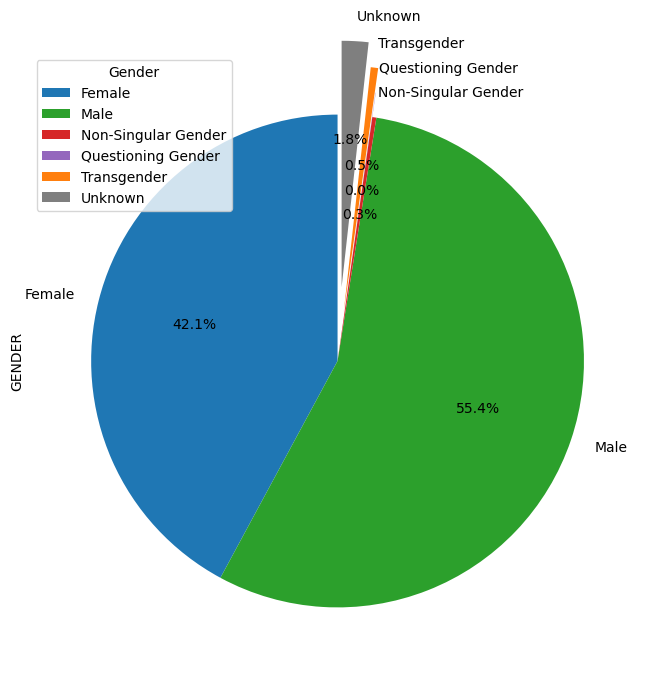

In [6]:
# Visualization of proportion of gender experiencing homelessness count in California for year 2022
explode = [0,0,0,0.1,0.2,0.3]
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e', '#7f7f7f']
plt.figure(figsize=(8, 8))
plt.pie(cleaned_df["EXPERIENCING_HOMELESSNESS_CNT"],labels = cleaned_df["GENDER"],autopct ="%1.1f%%",startangle=90, explode = explode, colors = colors)
plt.ylabel("GENDER")
plt.legend(title = "Gender",loc = 'upper left')
plt.show()

In [7]:
# Cleaning and filtering age data
age_df1 = age[age["CALENDAR_YEAR"]==2022]
age_df = age_df1[age_df1["COC_ID"] == "All"]
age_df.sort_values(by = "EXPERIENCING_HOMELESSNESS_CNT",ascending = False)


,CALENDAR_YEAR,COC_ID,COC_NAME,AGE_GROUP_PUBLIC,EXPERIENCING_HOMELESSNESS_CNT
1788,2022,All,California,Under 18,67913
1784,2022,All,California,35-44,55839
1783,2022,All,California,25-34,54477
1785,2022,All,California,45-54,46531
1786,2022,All,California,55-64,44263
1782,2022,All,California,18-24,25046
1787,2022,All,California,65+,18537
1789,2022,All,California,Unknown,11228


In [8]:
#Changing data type of column "count of homelessness"
age_df["EXPERIENCING_HOMELESSNESS_CNT"]=age_df["EXPERIENCING_HOMELESSNESS_CNT"].astype(int)

C:\Users\tnord\AppData\Local\Temp\ipykernel_16352\763291789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df["EXPERIENCING_HOMELESSNESS_CNT"]=age_df["EXPERIENCING_HOMELESSNESS_CNT"].astype(int)


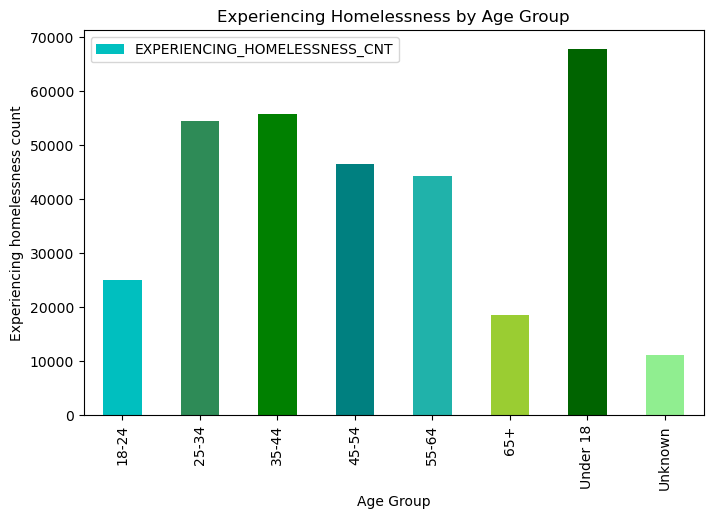

In [9]:
# Visualization of total population experiencing homelessness count in California for year 2022 by age
age_group = age_df[["AGE_GROUP_PUBLIC", "EXPERIENCING_HOMELESSNESS_CNT"]]
color = ['c','seagreen','green','teal','lightseagreen','yellowgreen','darkgreen','lightgreen']
# Plotting the bar chart
age_group.plot(kind="bar", x="AGE_GROUP_PUBLIC", y="EXPERIENCING_HOMELESSNESS_CNT", figsize=(8, 5), color = color)

# Customizing the chart
plt.xlabel("Age Group")
plt.ylabel("Experiencing homelessness count")
plt.title("Experiencing Homelessness by Age Group")

# Display the plot
plt.show()

In [12]:
# Cleaning and filtering race data
race1= race[(race["COC_ID"] == "All") & (race["CALENDAR_YEAR"] == "2022")]
race_df= race1[["CALENDAR_YEAR","RACE","EXPERIENCING_HOMELESSNESS"]]
race_df["EXPERIENCING_HOMELESSNESS"] = race_df["EXPERIENCING_HOMELESSNESS"].astype(int)
race_df.set_index("CALENDAR_YEAR")
race_df.groupby("CALENDAR_YEAR")["RACE"].sum()
race_df


C:\Users\tnord\AppData\Local\Temp\ipykernel_16352\761546636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df["EXPERIENCING_HOMELESSNESS"] = race_df["EXPERIENCING_HOMELESSNESS"].astype(int)


,CALENDAR_YEAR,RACE,EXPERIENCING_HOMELESSNESS
1533,2022,"American Indian, Alaska Native, or Indigenous",10651
1534,2022,Asian or Asian American,6055
1535,2022,"Black, African American, or African",86336
1536,2022,Multiple Races,13433
1537,2022,Native Hawaiian or Pacific Islander,3918
1538,2022,Unknown,20812
1539,2022,White,175735


In [13]:
print(race_df["EXPERIENCING_HOMELESSNESS"].sum())

316940


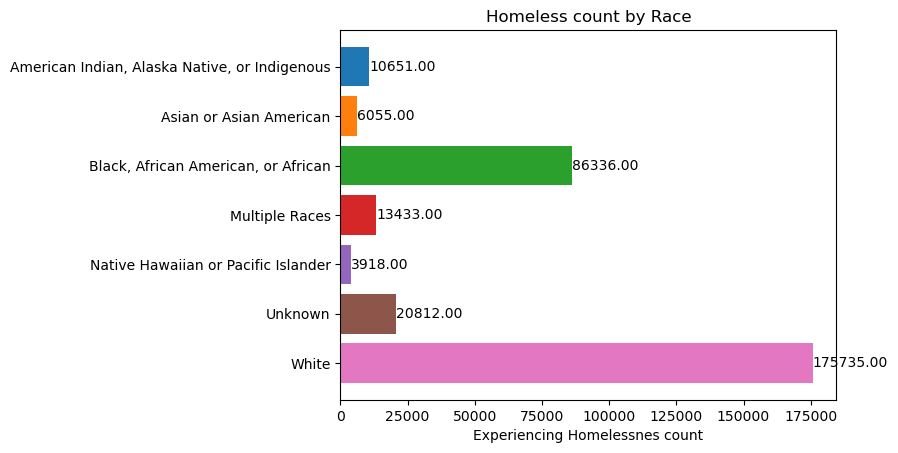

In [11]:
# Visualization of total population experiencing homelessness count in California for year 2022 by race
colors= ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
y_pos = np.arange(len(race_df["RACE"]))

fig, ax = plt.subplots()

hbars = ax.barh(y_pos,race_df["EXPERIENCING_HOMELESSNESS"] , align='center', color = colors)
ax.set_yticks(y_pos, labels=race_df["RACE"])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Experiencing Homelessnes count')
ax.set_title('Homeless count by Race')

ax.bar_label(hbars, fmt='%.2f')

plt.show()